In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing #通过移除均值并缩放到单位方差来标准化特征

import os

import lightgbm as lgb

In [288]:
ML = r"C:\Users\RCY19\OneDrive\Desktop\ML"
os.listdir(ML) 

['.ipynb_checkpoints',
 '50m buffer .csv',
 'GSV_REGRESSION.ipynb',
 'LD+PSP+MASK.csv',
 'nomarl vechicle psp mask.csv',
 'pspnet_merged.csv',
 'Untitled.ipynb',
 '合并导出.ipynb']

In [290]:
# 讀取electricity_cleaned.cs
GSV= pd.read_csv(os.path.join(ML,'LD+PSP+MASK.csv'))
GSV.head()

,ID,accidents_M,injury_M,accidents,injury,building,sky,tree,road,sidewalk,...,stop sign,dog,Tree Canopy Percentage,Grass/Shrubs Percentage,Bare Soil Percentage,Water Percentage,Buildings Percentage,Roads Percentage,Other Impervious Percentage,Railroads Percentage
0,7439,0,0,0,0,0.0,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,59.408676,2.158976,0.0,0.0,0.000000,9.941052,6.345215,0.0
1,7438,0,0,0,0,0.0,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,40.540665,13.007276,0.0,0.0,0.000000,0.000000,24.303215,0.0
2,7437,0,0,0,0,0.0,0.033570,0.854688,0.00000,0.000000,...,0.0,0.0,64.122652,1.457858,0.0,0.0,1.312811,3.568888,7.620033,0.0
3,7436,0,0,0,0,0.0,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,20.597555,51.224582,0.0,0.0,0.000000,0.898920,5.366728,0.0
4,7435,0,0,0,0,0.0,0.057227,0.481555,0.29209,0.018043,...,0.0,0.0,51.439843,11.196312,0.0,0.0,0.000000,8.492161,6.954851,0.0


<AxesSubplot: >

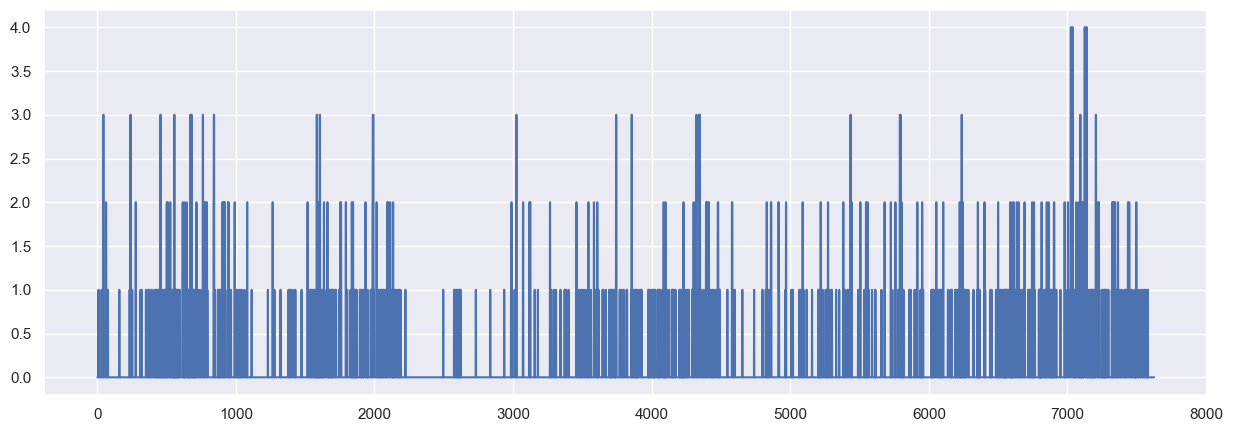

In [291]:
GSV['accidents_M'].plot(figsize=(15,5))

In [362]:
#設定輸入和輸出變數

input_var = ['building', 'sky', 'tree', 'road', 'sidewalk', 'person', 'car', 'skyscraper',
              'streetlight', 'wall', 'fence', 'railing', 'awning', 'signboard', 'ashcan', 'earth', 'van',
              'plant', 'bulletin board', 'minibike', 
             'bridge', 'water', 'person_number', 
              'car_number', 'bus_number', 'truck_number', 'motorcycle_number', 'traffic light', 'fire hydrant', 'bicycle_number', 
              'bench_number',  'stop sign','Tree Canopy Percentage', 'Grass/Shrubs Percentage','Buildings Percentage',
             'Other Impervious Percentage', 'Roads Percentage', 'Railroads Percentage']
   
target_var = 'accidents_M'

In [363]:
#切割數據: test_size=0.25
dataset = GSV.copy()
X_train, X_test, y_train, y_test = train_test_split(GSV[input_var], GSV[target_var], test_size=0.25, random_state=42)

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt

model: LGBMRegressor
r2_score: 0.333
mean_absolute_percentage_error: 573699987638885.6
mean_absolute_error: 0.255
Random Forest RMSE: 0.444


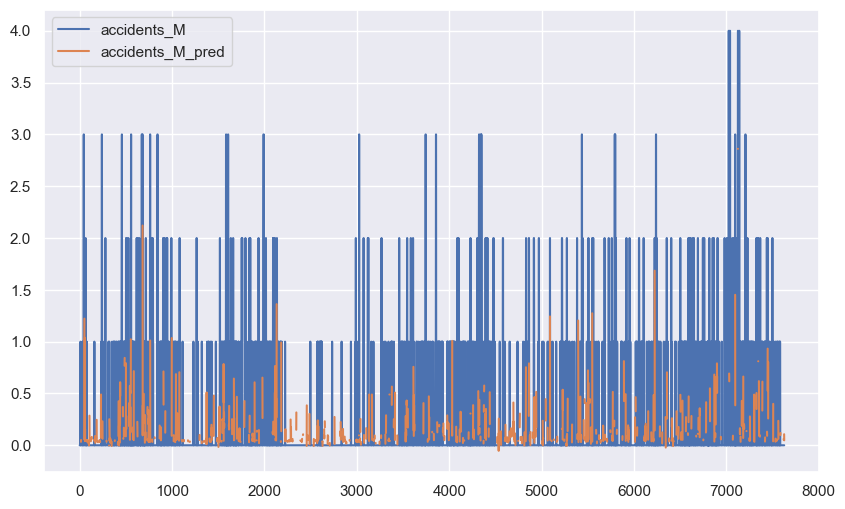

In [365]:
#建立LGBMRegressor model
print('model: LGBMRegressor')
model = lgb.LGBMRegressor(n_estimators=30) 
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('LGBMR model _results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

In [366]:
#輸出特徵的重要性(lightGBM)
#lgb.plot_importance(model, ax=None, height=0.2, xlim=None, ylim=None, importance_type='auto')
#plt.show()

In [367]:
importance_normalized = np.round((importance / np.sum(importance)), 3)

In [368]:
for i in range(len(importance_normalized)):
    print("Feature {}: importance score = {}".format(i, importance_normalized[i]))

Feature 0: importance score = 0.034
Feature 1: importance score = 0.05
Feature 2: importance score = 0.036
Feature 3: importance score = 0.029
Feature 4: importance score = 0.028
Feature 5: importance score = 0.02
Feature 6: importance score = 0.043
Feature 7: importance score = 0.0
Feature 8: importance score = 0.018
Feature 9: importance score = 0.022
Feature 10: importance score = 0.016
Feature 11: importance score = 0.0
Feature 12: importance score = 0.008
Feature 13: importance score = 0.03
Feature 14: importance score = 0.026
Feature 15: importance score = 0.002
Feature 16: importance score = 0.024
Feature 17: importance score = 0.029
Feature 18: importance score = 0.0
Feature 19: importance score = 0.008
Feature 20: importance score = 0.004
Feature 21: importance score = 0.001
Feature 22: importance score = 0.0
Feature 23: importance score = 0.0
Feature 24: importance score = 0.042
Feature 25: importance score = 0.023
Feature 26: importance score = 0.012
Feature 27: importance s

In [369]:
importance = model.feature_importances_
importance_df = pd.DataFrame({'feature': model.feature_name_, 'importance': importance})
importance_df = importance_df.sort_values(by='importance')

In [370]:
importance_df = importance_df.sort_values(by='importance')

In [371]:
importance_df = importance_df.set_index('feature')

In [372]:
importance_df['importance'] = (importance_df['importance'] - importance_df['importance'].min()) / \
                              (importance_df['importance'].max() - importance_df['importance'].min())
importance_df = importance_df.round(3)

<Figure size 1500x800 with 0 Axes>

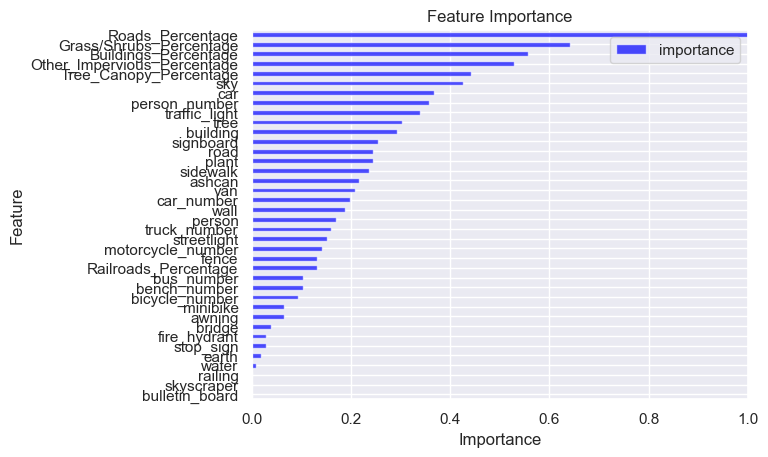

In [373]:
import matplotlib.pyplot as plt

# 设置图像大小和字体大小
plt.figure(figsize=(15, 8))  # 设置图像尺寸，您可以根据需要调整这些值
plt.rcParams.update({'font.size': 3})  # 设置字体大小

importance_df.plot(kind='barh', color='blue', alpha=0.7)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.xlim(0, 1)
plt.savefig('importance_5LL.png', dpi=300, bbox_inches='tight')
plt.show()


model: svm.SVR
r2_score: -0.023
mean_absolute_percentage_error: 383918223372966.44
mean_absolute_error: 0.264
Random Forest RMSE: 0.551


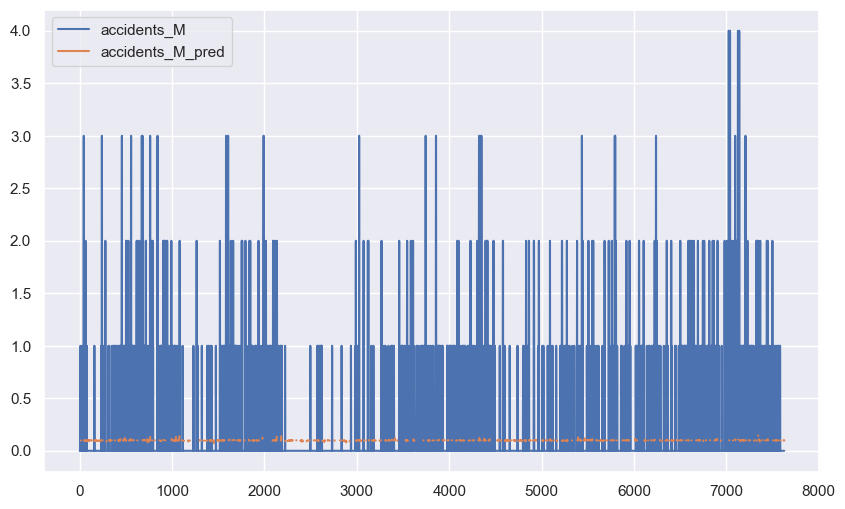

CPU times: total: 500 ms
Wall time: 1.82 s


In [374]:
%%time
#建立svm model
from sklearn import svm

print('model: svm.SVR')
model = svm.SVR()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('svm model _results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

r2_score: 0.527
mean_absolute_percentage_error: 549217162737956.4
mean_absolute_error: 0.22
Random Forest RMSE: 0.374


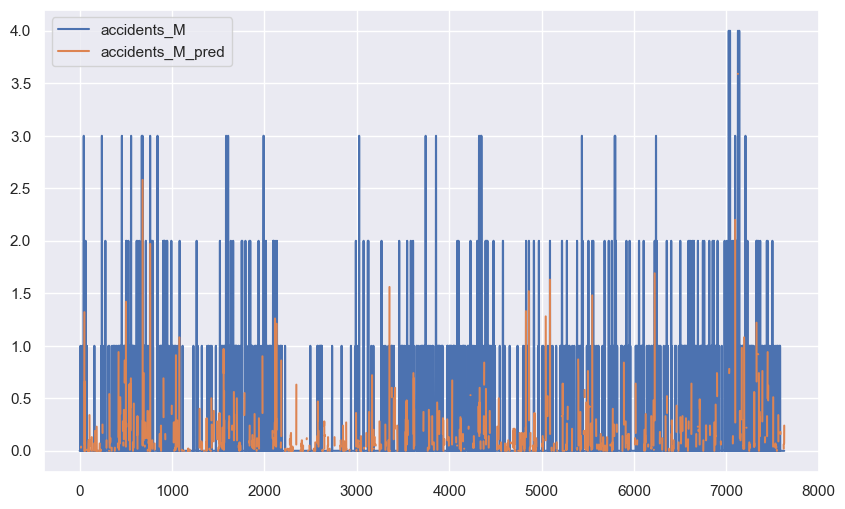

CPU times: total: 1.7 s
Wall time: 5.71 s


In [346]:
%%time
##建立RamdomForestRegressor model  速度慢但效果出众
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('RamdomForest model _results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

r2_score: 0.023
mean_absolute_percentage_error: 491215900625623.06
mean_absolute_error: 0.211
Random Forest RMSE: 0.538


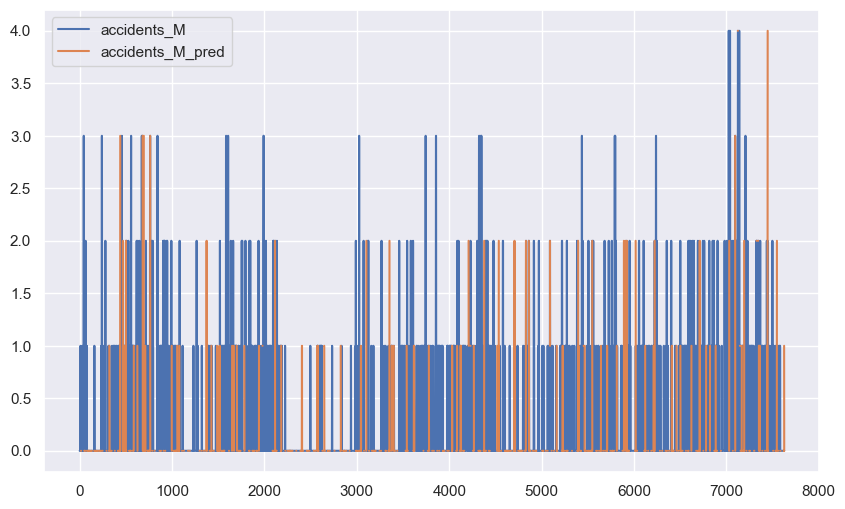

CPU times: total: 250 ms
Wall time: 692 ms


In [347]:
%%time
##建立Decision Tree model  
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('Decision Tree model _results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

r2_score: 0.286
mean_absolute_percentage_error: 602917709808179.0
mean_absolute_error: 0.267
Random Forest RMSE: 0.46


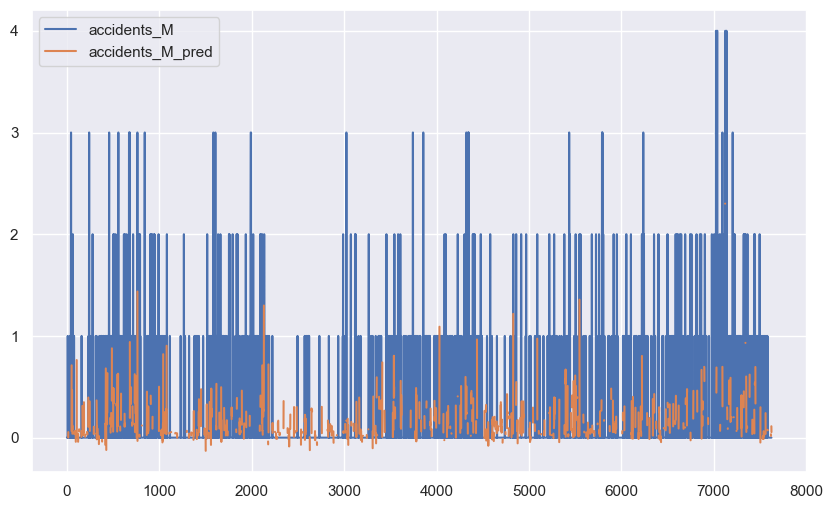

CPU times: total: 859 ms
Wall time: 2.78 s


In [348]:
%%time
##建立Gradient Boosting e model  
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred'] = y_test_pred

r2 = r2_score(y_test, y_test_pred)
MAPE = mean_absolute_percentage_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2_score: '+str(round(r2, 3)))
print('mean_absolute_percentage_error: '+str(round(MAPE, 3)))
print('mean_absolute_error: '+str(round(MAE, 3)))
print('Random Forest RMSE: '+str(round(RMSE, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('gradient_boosting_results.png', dpi=300, bbox_inches='tight')  # 添加此行以保存图像
plt.show()

KNN r2_score: 0.183
KNN mean_absolute_percentage_error: 560647378887129.5
KNN mean_absolute_error: 0.253
KNN RMSE: 0.492


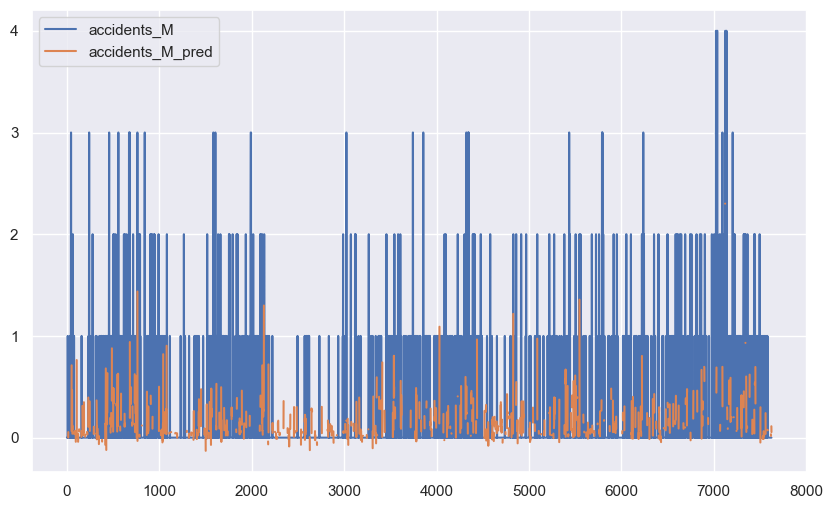

CPU times: total: 2.03 s
Wall time: 781 ms


In [349]:
%%time
##建立KNN模型
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_test_pred_knn = knn_model.predict(X_test)
dataset.loc[X_test.index, 'accidents_M_pred_knn'] = y_test_pred_knn

r2_knn = r2_score(y_test, y_test_pred_knn)
MAPE_knn = mean_absolute_percentage_error(y_test, y_test_pred_knn)
MAE_knn = mean_absolute_error(y_test, y_test_pred_knn)
RMSE_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))

print('KNN r2_score: '+str(round(r2_knn, 3)))
print('KNN mean_absolute_percentage_error: '+str(round(MAPE_knn, 3)))
print('KNN mean_absolute_error: '+str(round(MAE_knn, 3)))
print('KNN RMSE: '+str(round(RMSE_knn, 3)))

fig, ax = plt.subplots(figsize=(10, 6))
dataset[['accidents_M','accidents_M_pred']].plot(ax=ax)
plt.savefig('knn_results.png', dpi=300, bbox_inches='tight') # 添加此行以保存图像
plt.show()